 <B>MACHINE LEARNING ASSIGNMENT 1

<B> TASK TO PERFORM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
bm=pd.read_csv("bank-marketing.csv")

In [3]:
bm.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<b>1. Describe the pdays column, make note of the mean, median and minimum values. Anything 
fishy in the values?

In [4]:
print("Mean of the pdays column is", bm['pdays'].mean())
print("Median of the pdays column is", bm['pdays'].median())
print("Min of the pdays column is", bm['pdays'].min())

Mean of the pdays column is 40.19782796222158
Median of the pdays column is -1.0
Min of the pdays column is -1


yes, there are fishy value -1 because no. of days passed can not be negative hence it is outlier.

<b>2. Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How 
different are the mean and the median values?

In [5]:
print("Mean of pdays column after eliminating -1 values is", bm[bm['pdays'] != -1]['pdays'].mean() )
print("Median of pdays column after eliminating -1 values is", bm[bm['pdays'] != -1]['pdays'].median() )

Mean of pdays column after eliminating -1 values is 224.57769165556496
Median of pdays column after eliminating -1 values is 194.0


<b>3. Plot a horizontal bar graph with the median values of balance for each education level value. 
Which group has the highest median?

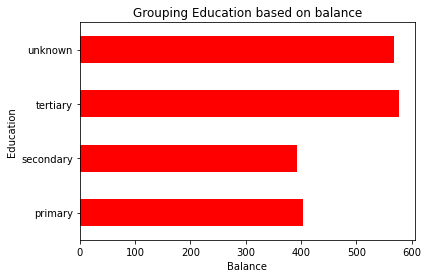

In [6]:
bm.groupby('education')['balance'].median().plot.barh(color='red')
plt.ylabel('Education')
plt.xlabel('Balance')
plt.title('Grouping Education based on balance');

Tertiary group has highest median.

<b>4.Make a box plot for pdays. Do you see any outliers?

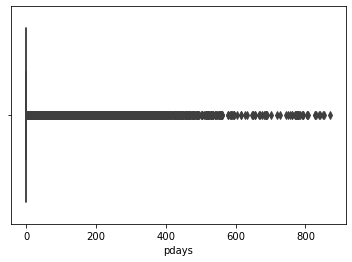

In [7]:
sns.boxplot(bm['pdays']);

yes there are seen lot of outlier.

<b>5. The final goal is to make a predictive model to predict if the customer will respond positively to the 
campaign or not. The target variable is “response”.
First, perform bi-variate analysis to identify the features that are directly associated with the target 
variable. You can refer to the notebook we used for the EDA discussion.
i. Convert the response variable to a convenient form
ii. Make suitable plots for associations with numerical features and categorical features’


In [8]:
bm.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

there are no null value.

In [9]:
bm.response.replace({'yes':1,'no':0}, inplace = True)

In [10]:
all_cols = bm.columns
numerical_cols = bm._get_numeric_data().columns.to_list()
categorical_cols = list(set(all_cols)- set(numerical_cols))

In [11]:
bm.response.sample(10)

38362    0
44748    1
1164     0
25711    0
15404    0
10517    0
27662    0
5930     0
7707     0
40415    0
Name: response, dtype: int64

We have successfully handled the Target variable i.e Response columns.

In [12]:
bm.corr()

,age,salary,balance,day,duration,campaign,pdays,previous,response
age,1.000000,0.024357,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
salary,0.024357,1.000000,0.055469,0.027864,-0.009937,0.015005,-0.014968,0.014564,0.020012
balance,0.097783,0.055469,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.027864,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,-0.009937,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,0.015005,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,-0.014968,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.014564,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
response,0.025155,0.020012,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


From the above, we can see previous collumns is not highly corelated with the response variable.

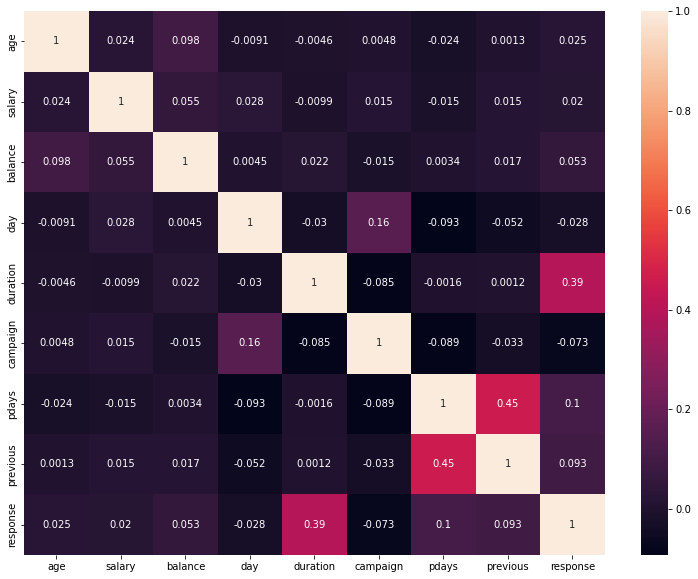

In [13]:
plt.figure(figsize=(13,10))
sns.heatmap(bm.corr(),annot=True);

<AxesSubplot:xlabel='education', ylabel='age'>

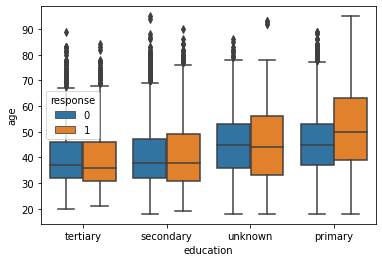

In [14]:
sns.boxplot(bm['education'],bm['age'],hue=bm['response'])

Association of Numerical value

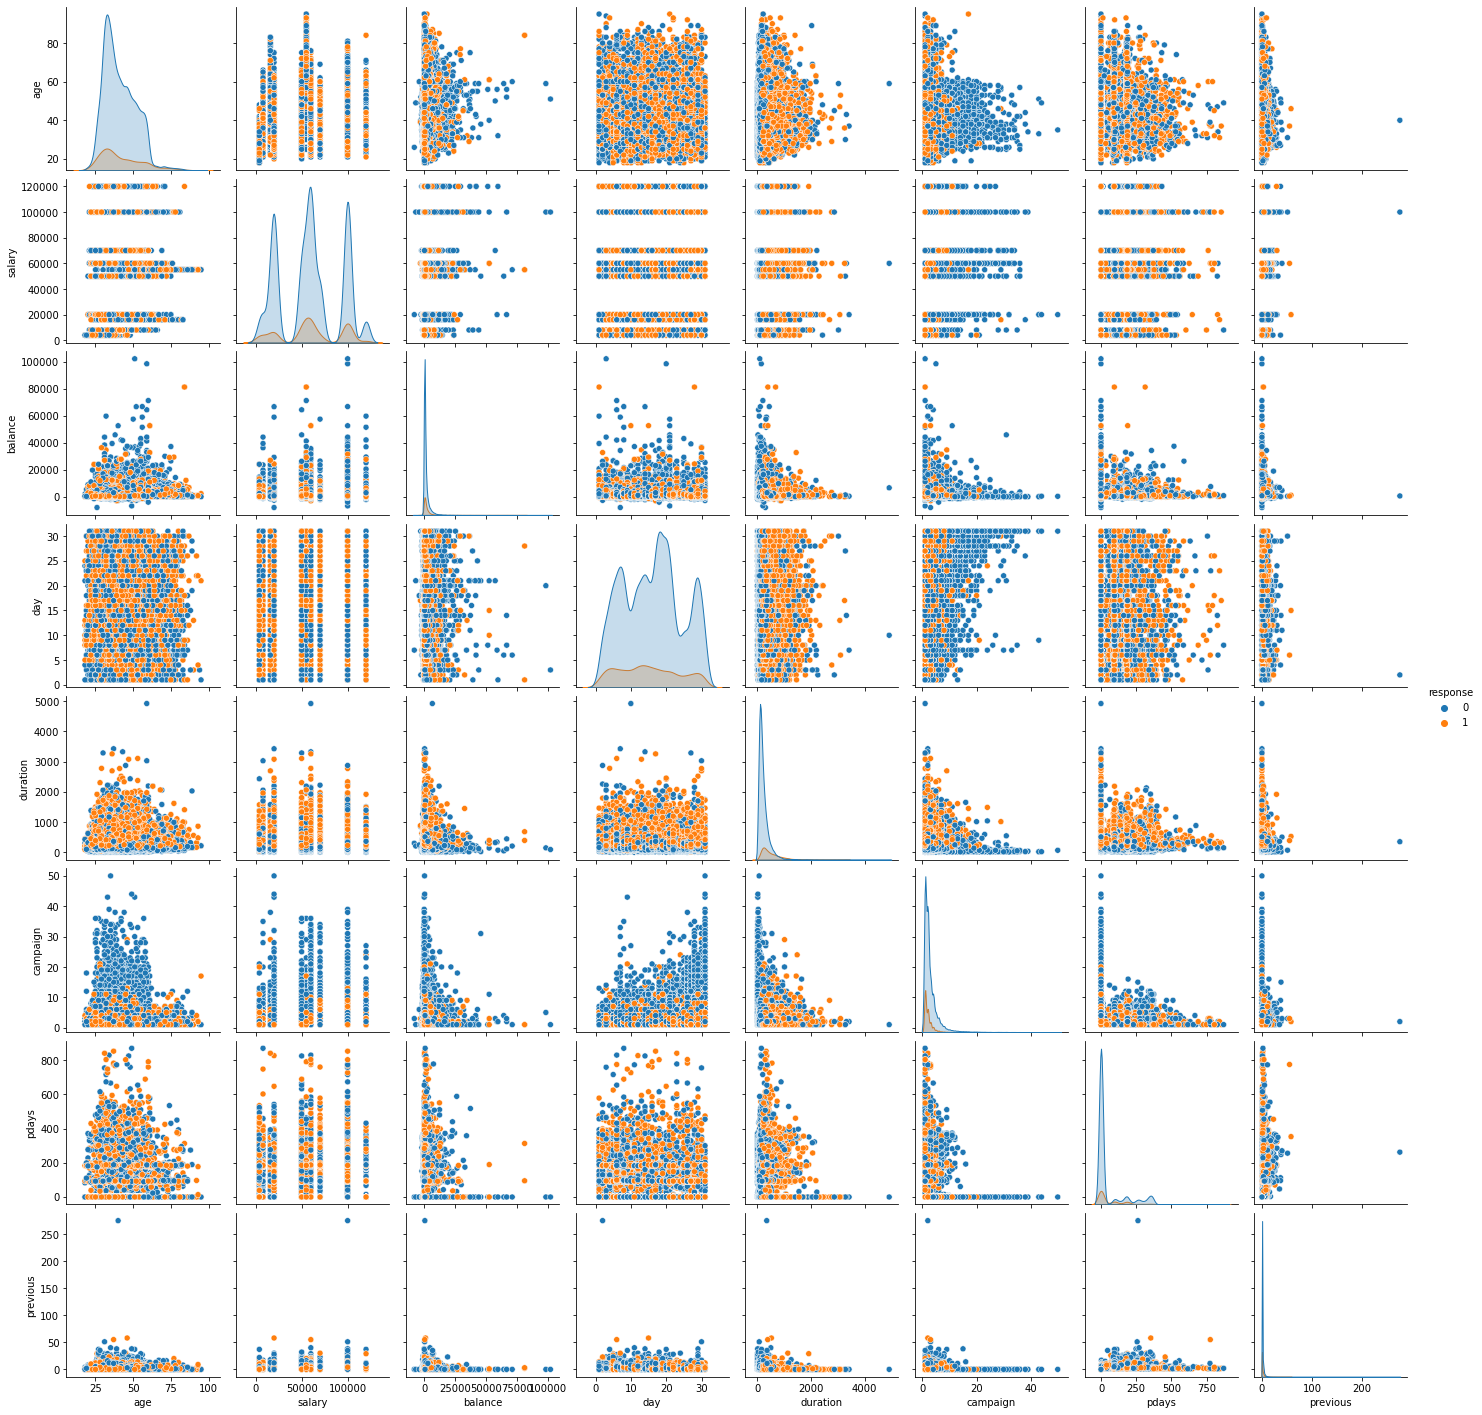

In [61]:
sns.pairplot(bm,hue='response');

Association of categorical value

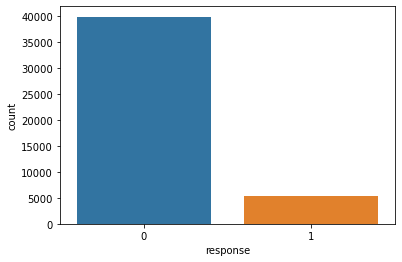

In [16]:
sns.countplot(x='response', data=bm);

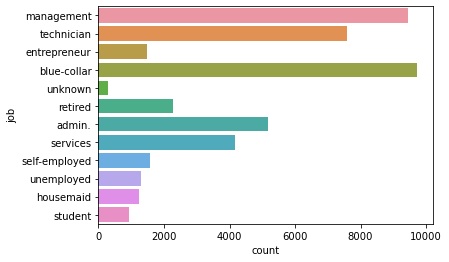

In [17]:
sns.countplot(y='job', data=bm);

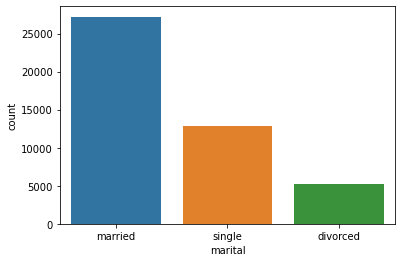

In [18]:
sns.countplot(x='marital', data=bm);

<AxesSubplot:xlabel='count', ylabel='education'>

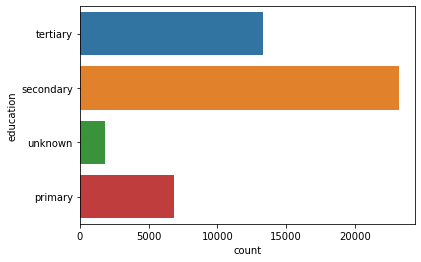

In [19]:
sns.countplot(y='education', data=bm)

<b>7. Are pdays and poutcome associated with the target? 
If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the 
previous campaign data is missing? Explain your approach and your decision

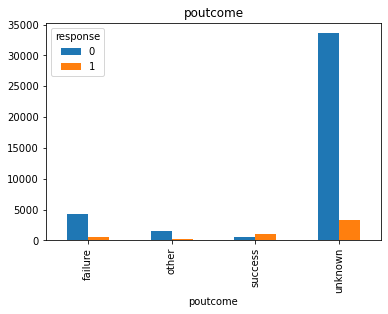

In [20]:
pd.crosstab(bm['poutcome'],bm['response']).plot.bar()
plt.title('poutcome');

poutcome column is not assosciated with target column because it has more than 75% missing values.

In [21]:
#bm.drop('poutcome',axis=1,inplace=True)

In [22]:
bm['pdays'].value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

 pdays = -1, it indicates that this person was not previosly contacted so, i have dropped these records because we want to study on people who was involved in the campaign

<b>Data Preprocessing

Convert Categorical Features into Numerical

In [23]:
bm.drop(bm[bm['contact']=='unknown'].index, inplace=True)
bm.drop(bm[bm['job']=='unknown'].index, inplace=True)


In [24]:
bm_new=bm.copy(deep=True)

In [25]:
from sklearn.preprocessing import LabelEncoder
bm_new[categorical_cols] = bm[categorical_cols].apply(LabelEncoder().fit_transform)

In [26]:
bm_new.shape

(32014, 19)

In [27]:
bm_new.loc[bm_new['pdays']==-1,'pdays']=0
bm_new['pdays'].head()

12657    0
12658    0
12659    0
12660    0
12661    0
Name: pdays, dtype: int64

<b>Train-Test Split

In [28]:
X = bm_new
y = bm_new.pop('response')


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=0)
X_train.shape, y_train.shape

((22409, 18), (22409,))

<b>Feature scaling¶

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [31]:
sc.fit(X_train[numerical_cols[:-1]]) 

StandardScaler()

In [32]:
X_train[numerical_cols[:-1]] = sc.transform(X_train[numerical_cols[:-1]])
X_train.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
36832,-1.270375,0,-0.291080,2,1,1,0,-0.351118,1,0,0,-0.482981,8,-0.807302,2.089076,2.743291,3.314107,1
38839,-0.816749,4,1.275616,1,2,1,0,-0.295093,1,0,1,0.242559,8,-0.675574,1.083877,1.093339,1.936339,0
25999,0.725579,10,-1.607105,1,0,1,0,-0.401389,1,0,0,0.363482,9,-0.299761,-0.256387,-0.502811,-0.359941,3
20287,-0.998199,4,1.275616,2,2,0,0,-0.219990,0,0,0,-0.603904,1,-0.745313,0.413745,-0.502811,-0.359941,3
27477,0.544128,9,0.022259,1,1,1,0,-0.163360,0,0,0,0.605328,9,3.001196,-0.256387,-0.502811,-0.359941,3


In [33]:
X_test[numerical_cols[:-1]] = sc.transform(X_test[numerical_cols[:-1]])
X_test.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
21512,-0.998199,4,1.275616,0,1,1,0,-0.522523,1,1,0,0.363482,1,-0.369499,-0.256387,-0.502811,-0.359941,3
36810,0.544128,2,1.902295,1,0,1,0,-0.237252,0,0,0,-0.482981,8,2.505277,-0.591453,-0.502811,-0.359941,3
14804,1.360655,4,1.275616,0,2,0,0,-0.610043,0,0,0,0.000712,5,-0.706569,-0.591453,-0.502811,-0.359941,3
40813,-0.998199,4,1.275616,2,2,0,0,-0.278135,0,0,0,-0.603904,1,-0.125415,-0.256387,0.384935,1.477083,2
38462,1.723555,5,-0.134411,0,1,1,0,1.066759,1,0,0,-0.120211,8,-0.702695,0.413745,-0.502811,-0.359941,3


<b>Predictive model 1: Logistic regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score, classification_report
from sklearn.model_selection import cross_val_score

In [35]:
clf = LogisticRegression()

In [36]:
clf.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred = clf.predict(X_test)

In [38]:
def show_report(clf, y_test, y_pred): 
    print('Accuracy: ',accuracy_score(y_test, y_pred))
    print('Precision: ',precision_score(y_test, y_pred))
    print('Recall: ',recall_score(y_test, y_pred))
    print('\nClassification Report\n')
    print(classification_report(y_test, y_pred))
    print('\nconfusion_matrix\n')
    print(confusion_matrix(y_test, y_pred))
    print('\ncross validation:',cross_val_score(clf, X, y, cv=5))

In [39]:
show_report(clf, y_pred, y_test)

Accuracy:  0.8650702758979698
Precision:  0.2155049786628734
Recall:  0.6108870967741935

Classification Report

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      9109
           1       0.22      0.61      0.32       496

    accuracy                           0.87      9605
   macro avg       0.60      0.74      0.62      9605
weighted avg       0.94      0.87      0.89      9605


confusion_matrix

[[8006 1103]
 [ 193  303]]

cross validation: [0.88068093 0.87459004 0.85725441 0.81914727 0.8422368 ]


<b>RFE Model

In [40]:
from sklearn.feature_selection import RFE
rfe = RFE(clf, 15)

In [41]:
rfe = rfe.fit(X_train, y_train)
ranks = rfe.ranking_
ranks

array([1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1])

In [42]:
print(X_train.columns[rfe.support_])
cols = X_train.columns[rfe.support_]
clf.fit(X_train[cols],y_train)
y_pred2 = clf.predict(X_test[cols])

Index(['age', 'marital', 'education', 'targeted', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')


In [43]:
show_report(clf, y_pred2, y_test)

Accuracy:  0.8655908381051536
Precision:  0.2119487908961593
Recall:  0.6195426195426196

Classification Report

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      9124
           1       0.21      0.62      0.32       481

    accuracy                           0.87      9605
   macro avg       0.59      0.75      0.62      9605
weighted avg       0.94      0.87      0.89      9605


confusion_matrix

[[8016 1108]
 [ 183  298]]

cross validation: [0.88068093 0.87459004 0.85725441 0.81914727 0.8422368 ]


<B> VIF

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
vif = pd.DataFrame()
vif['features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i).round(2) for i in range(X_train[cols].shape[1])]
vif = vif.sort_values(by='VIF', ascending=True)
vif

,features,VIF
10,duration,1.01
4,default,1.03
5,balance,1.03
9,day,1.06
11,campaign,1.07
8,contact,1.15
7,loan,1.22
0,age,1.28
13,previous,1.44
6,housing,2.10


<b> p-value

In [46]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
a = sm.add_constant(X_train[cols])
b = y_train

In [47]:
model = sm.OLS(b, a)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     378.2
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:10:44   Log-Likelihood:                -6078.2
No. Observations:               22409   AIC:                         1.219e+04
Df Residuals:                   22393   BIC:                         1.232e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1027      0.015      6.893      0.0

In [48]:
pvals = []
for i in cols:
    a = round(results.pvalues[i],3)
    pvals.append(a)

a = zip(cols, pvals)
bank_pvals = pd.DataFrame(a, columns=['Column', 'pvalues']).sort_values('pvalues')
bank_pvals

,Column,pvalues
0,age,0.000
1,marital,0.000
2,education,0.000
3,targeted,0.000
5,balance,0.000
6,housing,0.000
7,loan,0.000
10,duration,0.000
11,campaign,0.000
12,pdays,0.000


In [49]:
final_features = bank_pvals.nlargest(8, 'pvalues')['Column'].to_list()
final_features

['contact',
 'day',
 'default',
 'age',
 'marital',
 'education',
 'targeted',
 'balance']

<b> using selected feature

In [50]:
clf.fit(X_train[final_features], y_train)
y_pred3 = clf.predict(X_test[final_features])

In [51]:
show_report(clf, y_pred3, y_test)

Accuracy:  0.8537220197813639
Precision:  0.0007112375533428165
Recall:  1.0

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      9604
           1       0.00      1.00      0.00         1

    accuracy                           0.85      9605
   macro avg       0.50      0.93      0.46      9605
weighted avg       1.00      0.85      0.92      9605


confusion_matrix

[[8199 1405]
 [   0    1]]

cross validation: [0.88068093 0.87459004 0.85725441 0.81914727 0.8422368 ]


In [52]:
from sklearn.feature_selection import SelectFromModel
smf = SelectFromModel(clf)
smf.fit(X_train,y_train)
features = smf.get_support()
feature_name = X_train.columns[features]
feature_name

Index(['default', 'housing', 'loan', 'duration', 'campaign', 'pdays'], dtype='object')

<b> Predictive model 2: Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators=48,max_depth=5)
clf2.fit(X_train,y_train)


RandomForestClassifier(max_depth=5, n_estimators=48)

In [54]:
y_pred_rf = clf2.predict(X_test)

In [55]:
show_report(clf2, y_pred_rf, y_test)

Accuracy:  0.8656949505465903
Precision:  0.12944523470839261
Recall:  0.7338709677419355

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      9357
           1       0.13      0.73      0.22       248

    accuracy                           0.87      9605
   macro avg       0.56      0.80      0.57      9605
weighted avg       0.97      0.87      0.91      9605


confusion_matrix

[[8133 1224]
 [  66  182]]

cross validation: [0.85241293 0.84148056 0.81383726 0.59175387 0.7892846 ]


['duration', 'poutcome', 'month', 'age', 'housing']


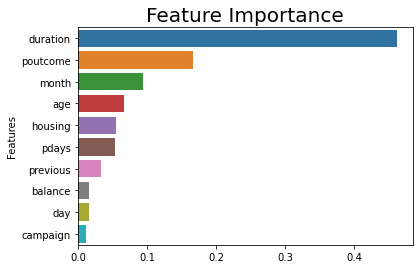

In [56]:
importances=clf2.feature_importances_
feature_importances=pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
selected_features = feature_importances.index.to_list()[:5]
print(selected_features)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10])
plt.title('Feature Importance',size=20)
plt.ylabel("Features")
plt.show()

In [57]:
clf2.fit(X_train[selected_features], y_train)
y_pred_rf2 = clf2.predict(X_test[selected_features])

In [58]:
show_report(clf2, y_pred_rf2, y_test)

Accuracy:  0.8700676730869339
Precision:  0.2411095305832148
Recall:  0.6519230769230769

Classification Report

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      9085
           1       0.24      0.65      0.35       520

    accuracy                           0.87      9605
   macro avg       0.61      0.77      0.64      9605
weighted avg       0.94      0.87      0.90      9605


confusion_matrix

[[8018 1067]
 [ 181  339]]

cross validation: [0.85256911 0.84351085 0.81383726 0.57598001 0.77147766]


<b>Compare the performance of the Random Forest and the logistic model

In [59]:
print('Logistic Regression\n')
show_report(clf , y_pred, y_test)
print('\n')
print('='*100)
print('='*100)
print('\nRandom Forest Classifier\n')
show_report(clf2, y_pred_rf2, y_test)

Logistic Regression

Accuracy:  0.8650702758979698
Precision:  0.2155049786628734
Recall:  0.6108870967741935

Classification Report

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      9109
           1       0.22      0.61      0.32       496

    accuracy                           0.87      9605
   macro avg       0.60      0.74      0.62      9605
weighted avg       0.94      0.87      0.89      9605


confusion_matrix

[[8006 1103]
 [ 193  303]]

cross validation: [0.88068093 0.87459004 0.85725441 0.81914727 0.8422368 ]



Random Forest Classifier

Accuracy:  0.8700676730869339
Precision:  0.2411095305832148
Recall:  0.6519230769230769

Classification Report

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      9085
           1       0.24      0.65      0.35       520

    accuracy                           0.87      9605
   macro avg       0.61      0.77      0.64      9605
wei

Random Forest Performs much better as its average accuracy score is 86.6% to that of Logistic regression which has an accuracy of 86.3%.

.